<a href="https://colab.research.google.com/github/guirzr1/ML_Credit_Score/blob/main/Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Credit Score


Objetivo desse projeto conjunto com a Alura é entender como o Machine Learning está no mercado financeiro, quais sao as particularidades desse setor e como construir, ajustar e escolher a melhor regressao logistica, será usada como motor na concessao de crédito do *ByteBank*, um banco digital.

Esse projeto é para entender como é usado os algoritmo por trás das decisoes das instituicaoes financeiras.


### Ciclo da Concessao de Crédito e risco associados

O crédito faz parte das nossas vidas o tempo todo: cartões de crédito, empréstimos pessoais e consignados, financiamento de veículos e imobiliários, são apenas alguns dos exemplos de como o crédito está inserido no nosso dia a dia.

Apesar disso poucas pessoas sabem quais sao as decisoes que sao tomadas por trás da concessao de credito.

A decisoes é composta pela cadeia de credito que é composta por quatro pilares: **A Prospecacao, a Concessao, a Gestao de Risco e a Recuperacao.**

 O Crediting Score, ele busca estimar a probabilidade de um evento acontecer frente a uma base de dados. Estamos falando de uma probabilidade, então o valor está concentrado entre 0 e 1.

 Pensando na concessão de crédito, o evento que nós estamos buscando é se um tomador vai ser inadimplente ou nao e isso é um evento binario.

 Toda concessao de crédito está  intrinsecamente relacionada ao risco.

 Podemos entender o risco de crédito como a probabilidade de receber um montante de dinheiro em um determinado período nao acontecer.

#### Carregamento dos dados

In [1]:
import pandas as pd

# Base de dados de crédito

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv')
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [2]:
# Informacoes da Base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [3]:
# Quantidade de linhas e colunas
dados.shape

(1000, 21)

#### Limpeza de Dados

In [4]:
# Verificando se existem valores duplicados
dados.duplicated().sum()

np.int64(0)

In [5]:
# Verificando se existem valores nulos
dados.isnull().sum()

,0
default,0
conta_corrente,0
prazo_emprestimo_meses,0
historico_credito,0
proposito_emprestimo,0
valor_emprestimo,0
reserva_cc,0
tempo_emprego_atual,0
taxa_comp_salario,0
sexo_est_civil,0


In [6]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


O Credit Scoring é um modelo estatístico multivariado que cria um modelo matemático e estima, através de uma probabilidade, a chance do nosso cliente ser adimplente ou inadimplente.


**CLASSIFICACAO**

O *ByteBank* precisa classificar os tomadores em bons e maus pagadores. Existem alguns algoritmos que são capazes de fazer essa classificação, por exemplo: a regressão logística, o random forest, Naive Bayes, support vector machine.

Vamos explorar a RandomForest. Ela é uma técnica muito usada no sistema financeiro e existem alguns motivos para isso. O primeiro deles é que ela tem um alto comprometimento com a explicabilidade, além de exigir pouco poder computacional.

#### Pipeline

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

def modelo_randomforest_creditscore(dados, target='default', seed=77):
    # Separar variáveis
    X = dados.drop(target, axis=1)
    y = dados[target]

    # Identificar colunas categóricas e numéricas
    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(include='object').columns.tolist()

    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    print(f"A base de treino tem {X_train.shape[0]} elementos e a base de teste tem {X_test.shape[0]} elementos.\n")

    # Pré-processamento
    preprocessador = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

    # Pipeline com SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessador', preprocessador),
        ('oversample', SMOTE(random_state=seed)),
        ('modelo', RandomForestClassifier(random_state=seed))
    ])

    # Hiperparâmetros para ajuste
    param_grid = {
        'modelo__n_estimators': [100, 200],
        'modelo__max_depth': [None, 10, 20],
        'modelo__min_samples_split': [2, 5],
        'modelo__min_samples_leaf': [1, 2],
        'modelo__class_weight': [None, 'balanced']
    }

    # Ajuste com GridSearchCV
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Melhor modelo
    modelo = grid.best_estimator_

    # Predição
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Avaliação
    print("\nRelatório de Classificação:\n")
    print(classification_report(y_test, y_pred))

    print("\nMatriz de Confusão:")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)

    print("\nCurva ROC:")
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)

    return modelo, X_train







A base de treino tem 700 elementos e a base de teste tem 300 elementos.


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       214
           1       0.70      0.52      0.60        86

    accuracy                           0.80       300
   macro avg       0.76      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300


Matriz de Confusão:

Curva ROC:


(Pipeline(steps=[('preprocessador',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['prazo_emprestimo_meses',
                                                    'valor_emprestimo',
                                                    'taxa_comp_salario',
                                                    'anos_residencia_atual',
                                                    'idade', 'n_creditos_banco',
                                                    'n_dependentes']),
                                                  ('cat',
                                                   OneHotEncoder(drop='first'),
                                                   ['conta_corrente',
                                                    'historico_credito',
                                                    'proposito_emprestimo',
                                                    'reserva_cc',
             

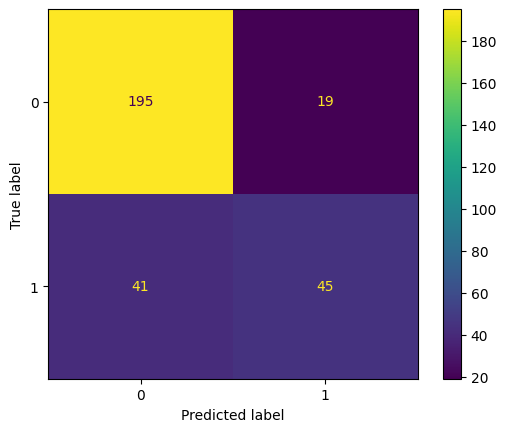

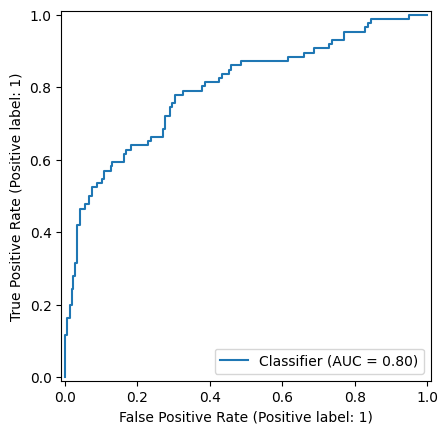

In [8]:
modelo_randomforest_creditscore(dados, target='default', seed=77)

#### Baseline com DumnmyClassifier

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

def modelo_dummy_baseline(dados, target='default', seed=77):
    X = dados.drop(target, axis=1)
    y = dados[target]

    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(include='object').columns.tolist()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    print(f"A base de treino tem {X_train.shape[0]} elementos e a base de teste tem {X_test.shape[0]} elementos.\n")

    preprocessador = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ], remainder='passthrough')

    pipeline = Pipeline(steps=[
        ('preprocessador', preprocessador),
        ('modelo', DummyClassifier(strategy='stratified', random_state=seed))
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    print("\nRelatório de Classificação:\n")
    print(classification_report(y_test, y_pred))

    print("\nMatriz de Confusão:")
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)

    print("\nCurva ROC:")
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)

    return pipeline




A base de treino tem 700 elementos e a base de teste tem 300 elementos.


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       214
           1       0.24      0.27      0.26        86

    accuracy                           0.55       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.57      0.55      0.56       300


Matriz de Confusão:

Curva ROC:


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessador',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['conta_corrente',
                                                   'historico_credito',
                                                   'proposito_emprestimo',
                                                   'reserva_cc',
                                                   'tempo_emprego_atual',
                                                   'sexo_est_civil',
                                                   'outros_fiadores',
                                                   'propriedade',
                                                   'outros_planos_financiamento',
                                                   'tipo_residencia',
                                                   'status_emprego', 'telefone',
                                                   'trabalhador_estrangeiro'])])),
                ('modelo',
                 DummyClassifier(random_state=77, strategy='stratified'))])

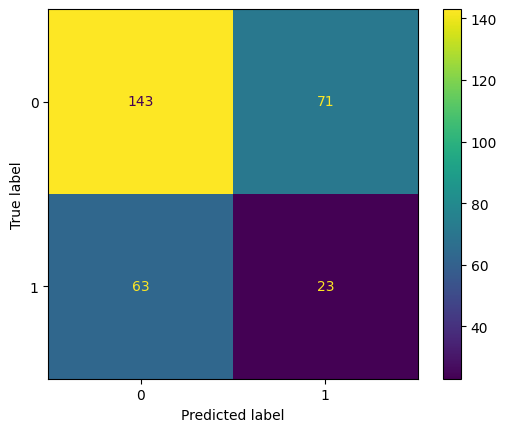

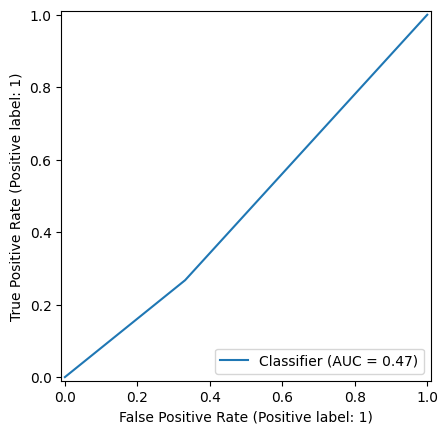

In [10]:
 modelo_dummy_baseline(dados, target='default', seed=77)

Um aspecto que nós ainda não mencionamos e que é muito importante e relevante no sistema financeiro, é que neste sistema nós não analisamos o indivíduo.
Nós analisamos o comportamento de um grupo e ajustamos esse individuo dentro de um grupo.

#### Features Engineering : Criando novas Variaveis

In [11]:
# Retirar colunas da base de dados, baseado na Lei de Proteção de Dados (LGPD)
colunas_lgpd= ['sexo_est_civil', 'sexo']
base_dados_lgpd = dados.drop(columns=colunas_lgpd, errors='ignore')

base_dados_lgpd.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [12]:
# Agrupar a idade em faixas
def aplicar_faixa_idade(base_dados_lgpd, coluna='idade', nova_coluna='faixa_idade'):
    bins = [18, 30, 40, 50, 60, 70, 80]
    labels = [1, 2, 3, 4, 5, 6]
    base_dados_lgpd[nova_coluna] = pd.cut(
        base_dados_lgpd[coluna], bins=bins, labels=labels, right=False
    )
    return base_dados_lgpd

# Agrupar o prazo em faixas
def aplicar_faixa_prazo(base_dados_lgpd):
    base_dados_lgpd['faixa_prazo_emprestimo'] = pd.cut(
        x=base_dados_lgpd['prazo_emprestimo_meses'],
        bins=[1, 12, 24, 36, 48, 60, 72],
        labels=[1, 2, 3, 4, 5, 6],
        right=True
    )
    return base_dados_lgpd

# Agrupar o valor do empréstimo em faixas
def aplicar_faixa_valor(base_dados_lgpd):
    bins = list(range(1, 21000, 1000))  # Vai de 1 até 20000 (exclusivo), com passo de 1000
    labels = list(range(1, 21))         # 20 labels para 20 faixas
    base_dados_lgpd['faixa_valor_emprestimo'] = pd.cut(
        x=base_dados_lgpd['valor_emprestimo'],
        bins=bins,
        labels=labels,
        right=True
    )
    return base_dados_lgpd


In [13]:
#Executando Funcoes
base_dados_lgpd = aplicar_faixa_idade(base_dados_lgpd)
base_dados_lgpd = aplicar_faixa_prazo(base_dados_lgpd)
base_dados_lgpd = aplicar_faixa_valor(base_dados_lgpd)


In [14]:
base_dados_lgpd.drop(['idade', 'prazo_emprestimo_meses', 'valor_emprestimo'], axis=1, inplace=True)


MODELO

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       214
           1       0.62      0.52      0.57        86

    accuracy                           0.77       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.76      0.77      0.77       300


Matriz de Confusão:

Curva ROC:


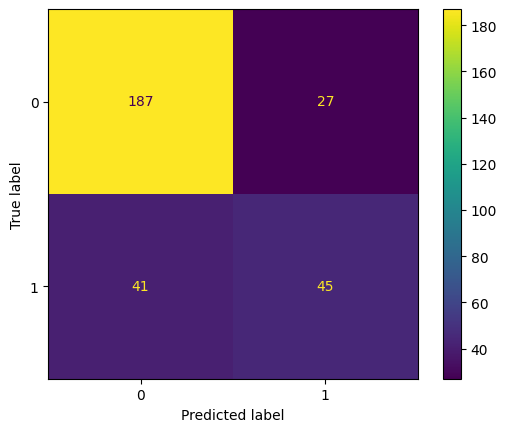

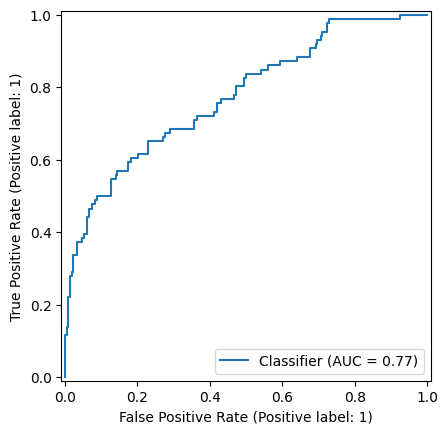

In [16]:
modelo, X_train = modelo_randomforest_creditscore(base_dados_lgpd)


Importancia das Variaveis

In [18]:
def mostrar_importancia_variaveis(modelo, X_train, nome_pipeline='modelo'):
    import matplotlib.pyplot as plt
    import pandas as pd

    rf = modelo.named_steps[nome_pipeline]
    col_names = modelo.named_steps['preprocessador'].get_feature_names_out()
    importancias = rf.feature_importances_

    df_importancia = pd.DataFrame({
        'feature': col_names,
        'importancia': importancias
    }).sort_values(by='importancia', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(df_importancia['feature'][:15][::-1], df_importancia['importancia'][:15][::-1])
    plt.title('Top 15 Features Importantes - Random Forest')
    plt.xlabel('Importância')
    plt.tight_layout()
    plt.show()

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       214
           1       0.62      0.52      0.57        86

    accuracy                           0.77       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.76      0.77      0.77       300


Matriz de Confusão:

Curva ROC:


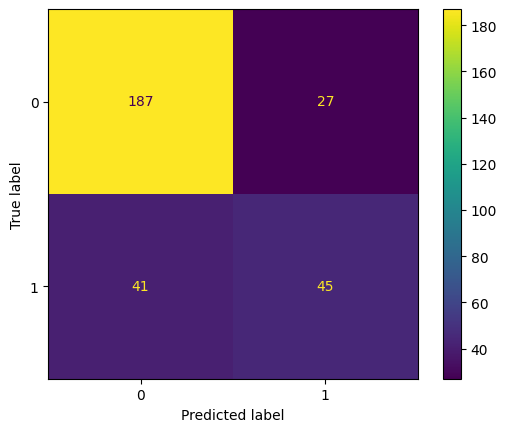

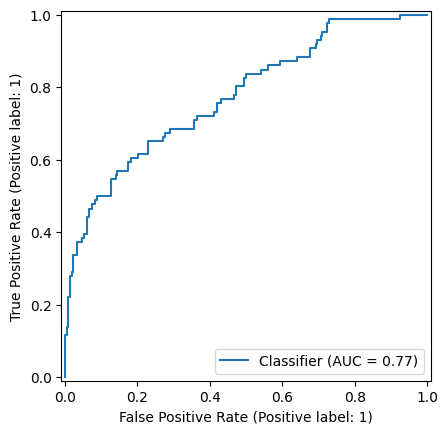

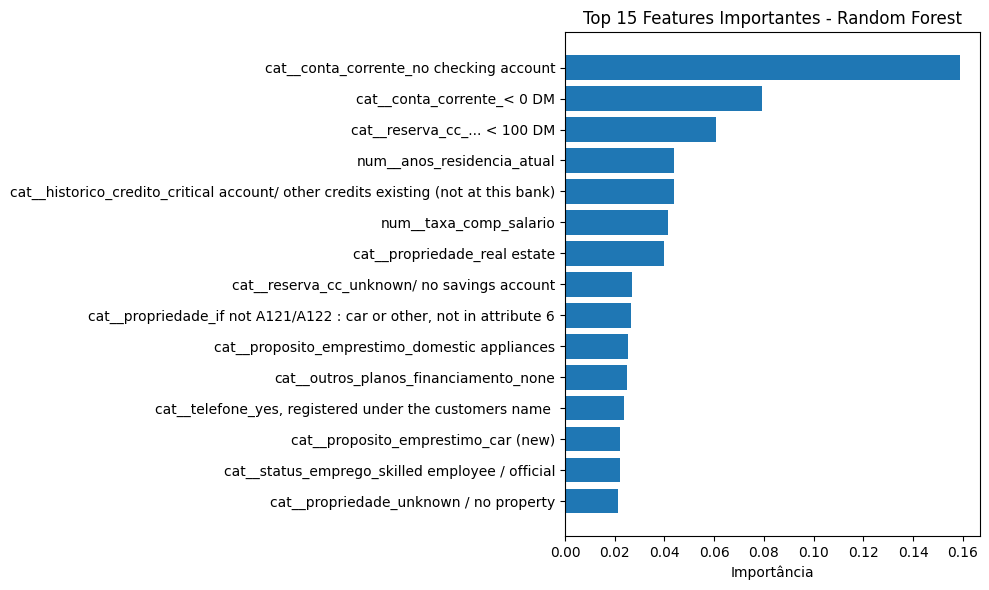

In [19]:
modelo, X_train = modelo_randomforest_creditscore(base_dados_lgpd)
mostrar_importancia_variaveis(modelo, X_train)


TESTE A/B


In [20]:
pip install xgboost


In [23]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

def teste_ab_modelos(dados, target='default', seed=77):
    from sklearn.model_selection import train_test_split
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from imblearn.pipeline import Pipeline as ImbPipeline
    from imblearn.over_sampling import SMOTE
    from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

    # Separar variáveis
    X = dados.drop(target, axis=1)
    y = dados[target]

    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(include='object').columns.tolist() + \
               X.select_dtypes(include='category').columns.tolist()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    preprocessador = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

    modelos = {
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=seed),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed),
        'RandomForest': RandomForestClassifier(random_state=seed)
    }

    resultados = {}

    for nome, modelo in modelos.items():
        print(f"\nTreinando {nome}...")

        pipeline = ImbPipeline(steps=[
            ('preprocessador', preprocessador),
            ('oversample', SMOTE(random_state=seed)),
            ('modelo', modelo)
        ])

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)

        print(f"\n➡️ {nome} - AUC: {auc:.4f}")
        print("\nRelatório de Classificação:\n")
        print(classification_report(y_test, y_pred))
        ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
        RocCurveDisplay.from_predictions(y_test, y_proba)

        resultados[nome] = {
            'modelo': pipeline,
            'auc': auc
        }

    return resultados



Treinando LogisticRegression...

➡️ LogisticRegression - AUC: 0.7743

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       214
           1       0.49      0.67      0.57        86

    accuracy                           0.71       300
   macro avg       0.67      0.70      0.67       300
weighted avg       0.74      0.71      0.72       300


Treinando XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:51:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



➡️ XGBoost - AUC: 0.7052

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       214
           1       0.57      0.45      0.50        86

    accuracy                           0.74       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300


Treinando RandomForest...

➡️ RandomForest - AUC: 0.7561

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       214
           1       0.68      0.47      0.55        86

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300



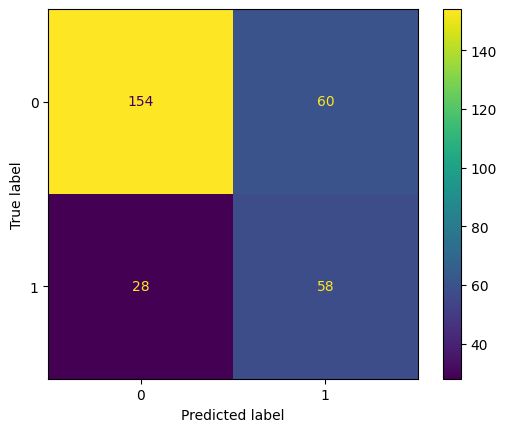

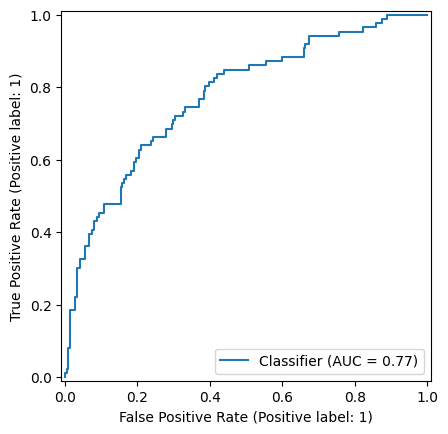

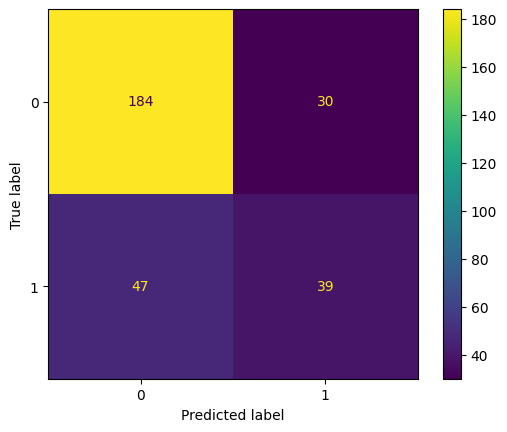

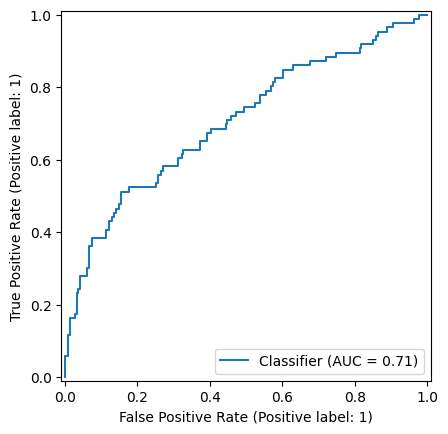

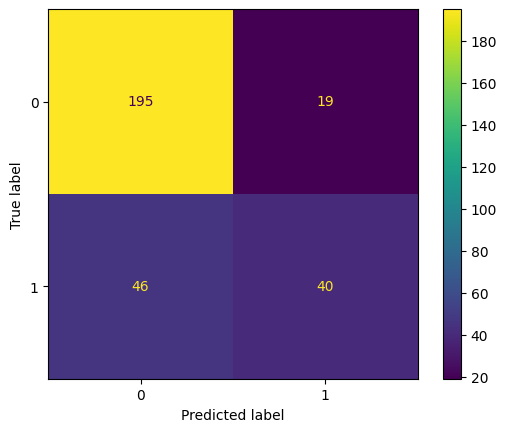

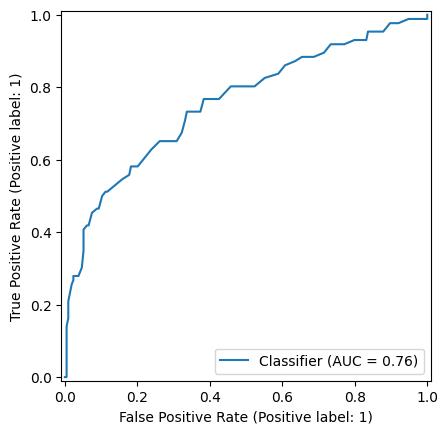

In [24]:
resultados_ab = teste_ab_modelos(base_dados_lgpd)


TABELA COMPARATIVA DOS MODELOS


In [25]:
from sklearn.metrics import f1_score

# Recalcular as métricas para os modelos testados
def comparar_modelos_ab(resultados, X_test, y_test):
    comparativo = []

    for nome, info in resultados.items():
        modelo = info['modelo']
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        comparativo.append({'Modelo': nome, 'AUC': round(auc, 4), 'F1 Classe 1': round(f1, 4)})

    df_comp = pd.DataFrame(comparativo).sort_values(by='AUC', ascending=False)
    return df_comp


In [27]:
# Separar os dados novamente, se necessário
X = base_dados_lgpd.drop('default', axis=1)
y = base_dados_lgpd['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

# Comparação
comparar_modelos_ab(resultados_ab, X_test, y_test).sort_values(by='AUC', ascending=False)


,Modelo,AUC,F1 Classe 1
0,LogisticRegression,0.7743,0.5686
2,RandomForest,0.7561,0.5517
1,XGBoost,0.7052,0.5032
